Importing the required libraries for the project

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Loading the Dataset of Cars purchased

In [ ]:
df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


Preprocessing the data to check for null values and using Label Encoder for labeling the categorical data into integers

In [ ]:
data = df.dropna()

In [ ]:
cleaned_data=data.drop(['User ID'],axis = 1)

In [ ]:
encoder = LabelEncoder()
cleaned_data['Gender'] = encoder.fit_transform(cleaned_data['Gender'])

In [ ]:
cleaned_data.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


Training the dataset using the Decision Tree Classifier and plotting the tree to determine the results

Model Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       352
           1       0.85      0.88      0.86       248

    accuracy                           0.89       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.89      0.89      0.89       600



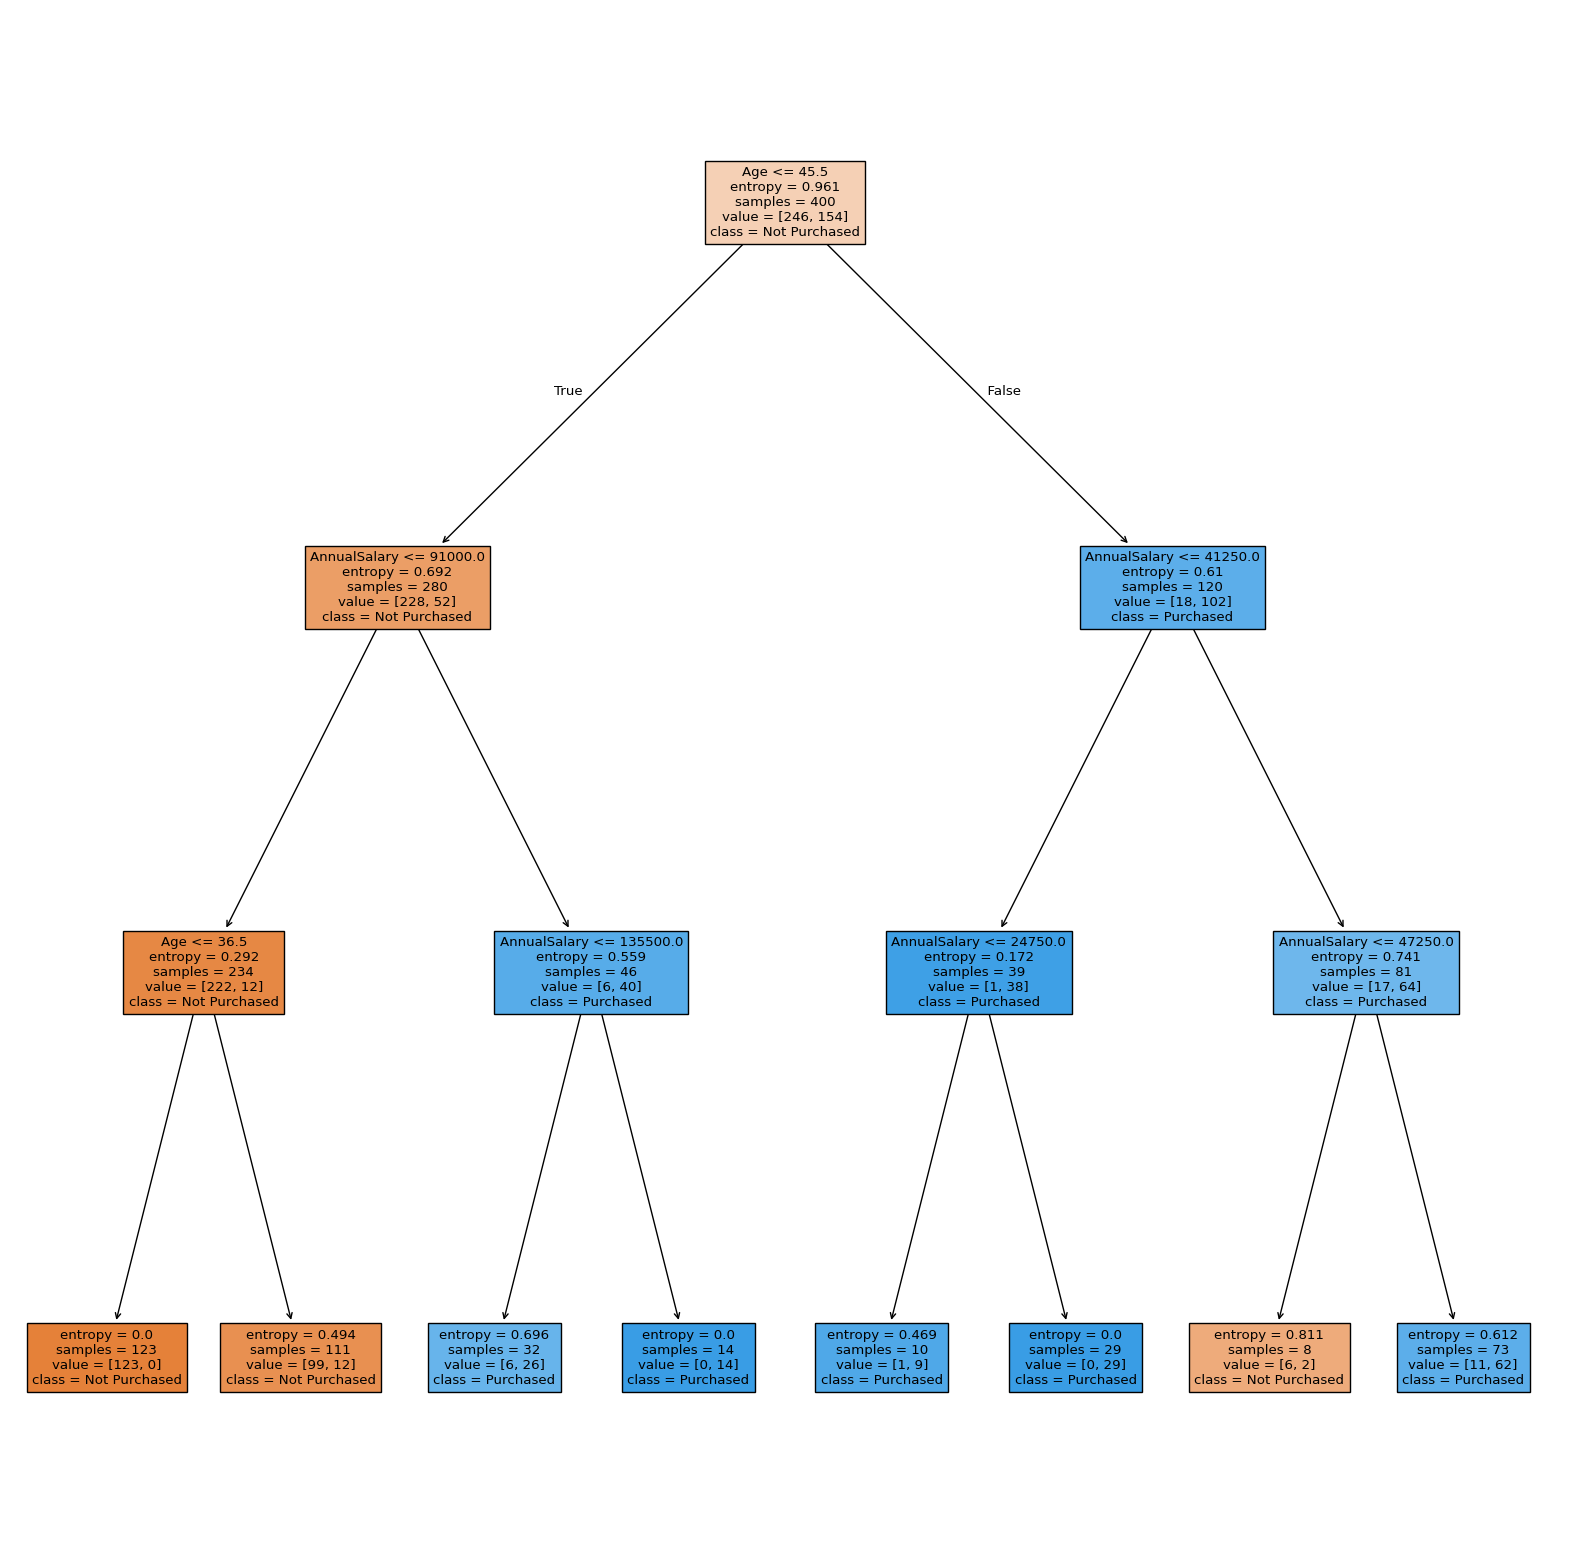

In [ ]:
# Step 3: Split data into features and target
X = cleaned_data.drop('Purchased', axis=1)
y = cleaned_data['Purchased']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

# Step 5: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini',max_depth= 3)
clf.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_output)

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(20, 20))
plot_tree(clf, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()

Predicting the result of the inputs which is provided externally

In [ ]:
clf.predict([[1,55,5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])